In [1]:
# Arquivo integrante do projeto para identificação dos preditores mais correlacionados 
# aos óbitos por COVID no Brasil, apresentado à PUC-MINAS como TCC

# Seleção de atributos


In [2]:
%run ./funcoes.ipynb

In [3]:
# Carrega a base tratada mas não balanceada
# Produzida pelo notebook COVID_Preprocessamento.ipynb
arquivo_base = "INFLUD21-29-03-2021.csv"  
ext_file = "_processed_pre_dummies.csv"
rad_filename = arquivo_base[:-4]  #exclui a extensão do arquivo
filename_pre_des = rad_filename + ext_file # constrói o nome do arquivo
covid_df_pre_dummies = load_df(filename_pre_des,";",None,None) #carrega os dados do arquivo csv.
print('Núm. linhas e colunas:',covid_df_pre_dummies.shape) #exibe a quantidade de linhas e colunas do dataframe

Núm. linhas e colunas: (254948, 43)


In [4]:
covid_df_pre_dummies = covid_df_pre_dummies.drop(['NU_IDADE_CAT'], axis = 1)

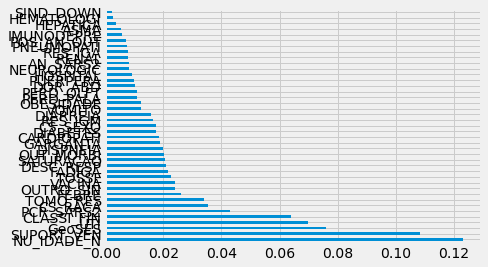

In [5]:
# Seleção das melhores features para o modelos "Tree based" (Gradient Boosting, Decision Tree, Random Forest Models)
modelo = ExtraTreesClassifier()
top_features_importance = sel_features_importance(covid_df_pre_dummies,modelo,20)

In [6]:
# Exibe as variáveis selecionadas
top_features_importance

['NU_IDADE_N',
 'SUPORT_VEN',
 'GeoSES',
 'UTI',
 'CLASSI_FIN',
 'PCR_SARS2',
 'CS_RACA',
 'TOMO_RES',
 'FEBRE',
 'OUTRO_SIN',
 'VACINA',
 'TOSSE',
 'FADIGA',
 'DESC_RESP',
 'SATURACAO',
 'OUT_MORBI',
 'DISPNEIA',
 'GARGANTA',
 'CARDIOPATI',
 'DIABETES',
 'CS_SEXO',
 'RES_IGM',
 'DIARREIA',
 'VOMITO',
 'OBESIDADE',
 'PERD_PALA',
 'PERD_OLFT',
 'DOR_ABD',
 'PUERPERA',
 'HOSPITAL',
 'NEUROLOGIC',
 'AN_SARS2',
 'RENAL',
 'RES_IGA',
 'PNEUMOPATI',
 'POS_AN_OUT',
 'IMUNODEPRE',
 'ASMA',
 'HEPATICA',
 'HEMATOLOGI',
 'SIND_DOWN']

In [7]:
# Seleção das variáveis com maior correlação com a variável dependente.
top_univariate_features = sel_univariate_features(covid_df_pre_dummies,20)

      variavel        Score
28   PCR_SARS2  4892.842753
14  CARDIOPATI  2125.238103
19    DIABETES  1605.466116
37  NU_IDADE_N  1333.303647
25   OUT_MORBI  1213.085992
2   SUPORT_VEN  1173.182784
24   OBESIDADE   763.455107
23       RENAL   670.499593
20  NEUROLOGIC   646.016794
21  PNEUMOPATI   621.185951
22  IMUNODEPRE   566.203995
1          UTI   550.867657
17    HEPATICA   546.299003
16   SIND_DOWN   537.770099
15  HEMATOLOGI   537.719478
9    SATURACAO   479.201720
18        ASMA   466.505546
8    DESC_RESP   315.869550
7     DISPNEIA   311.911419
12   OUTRO_SIN   288.484947


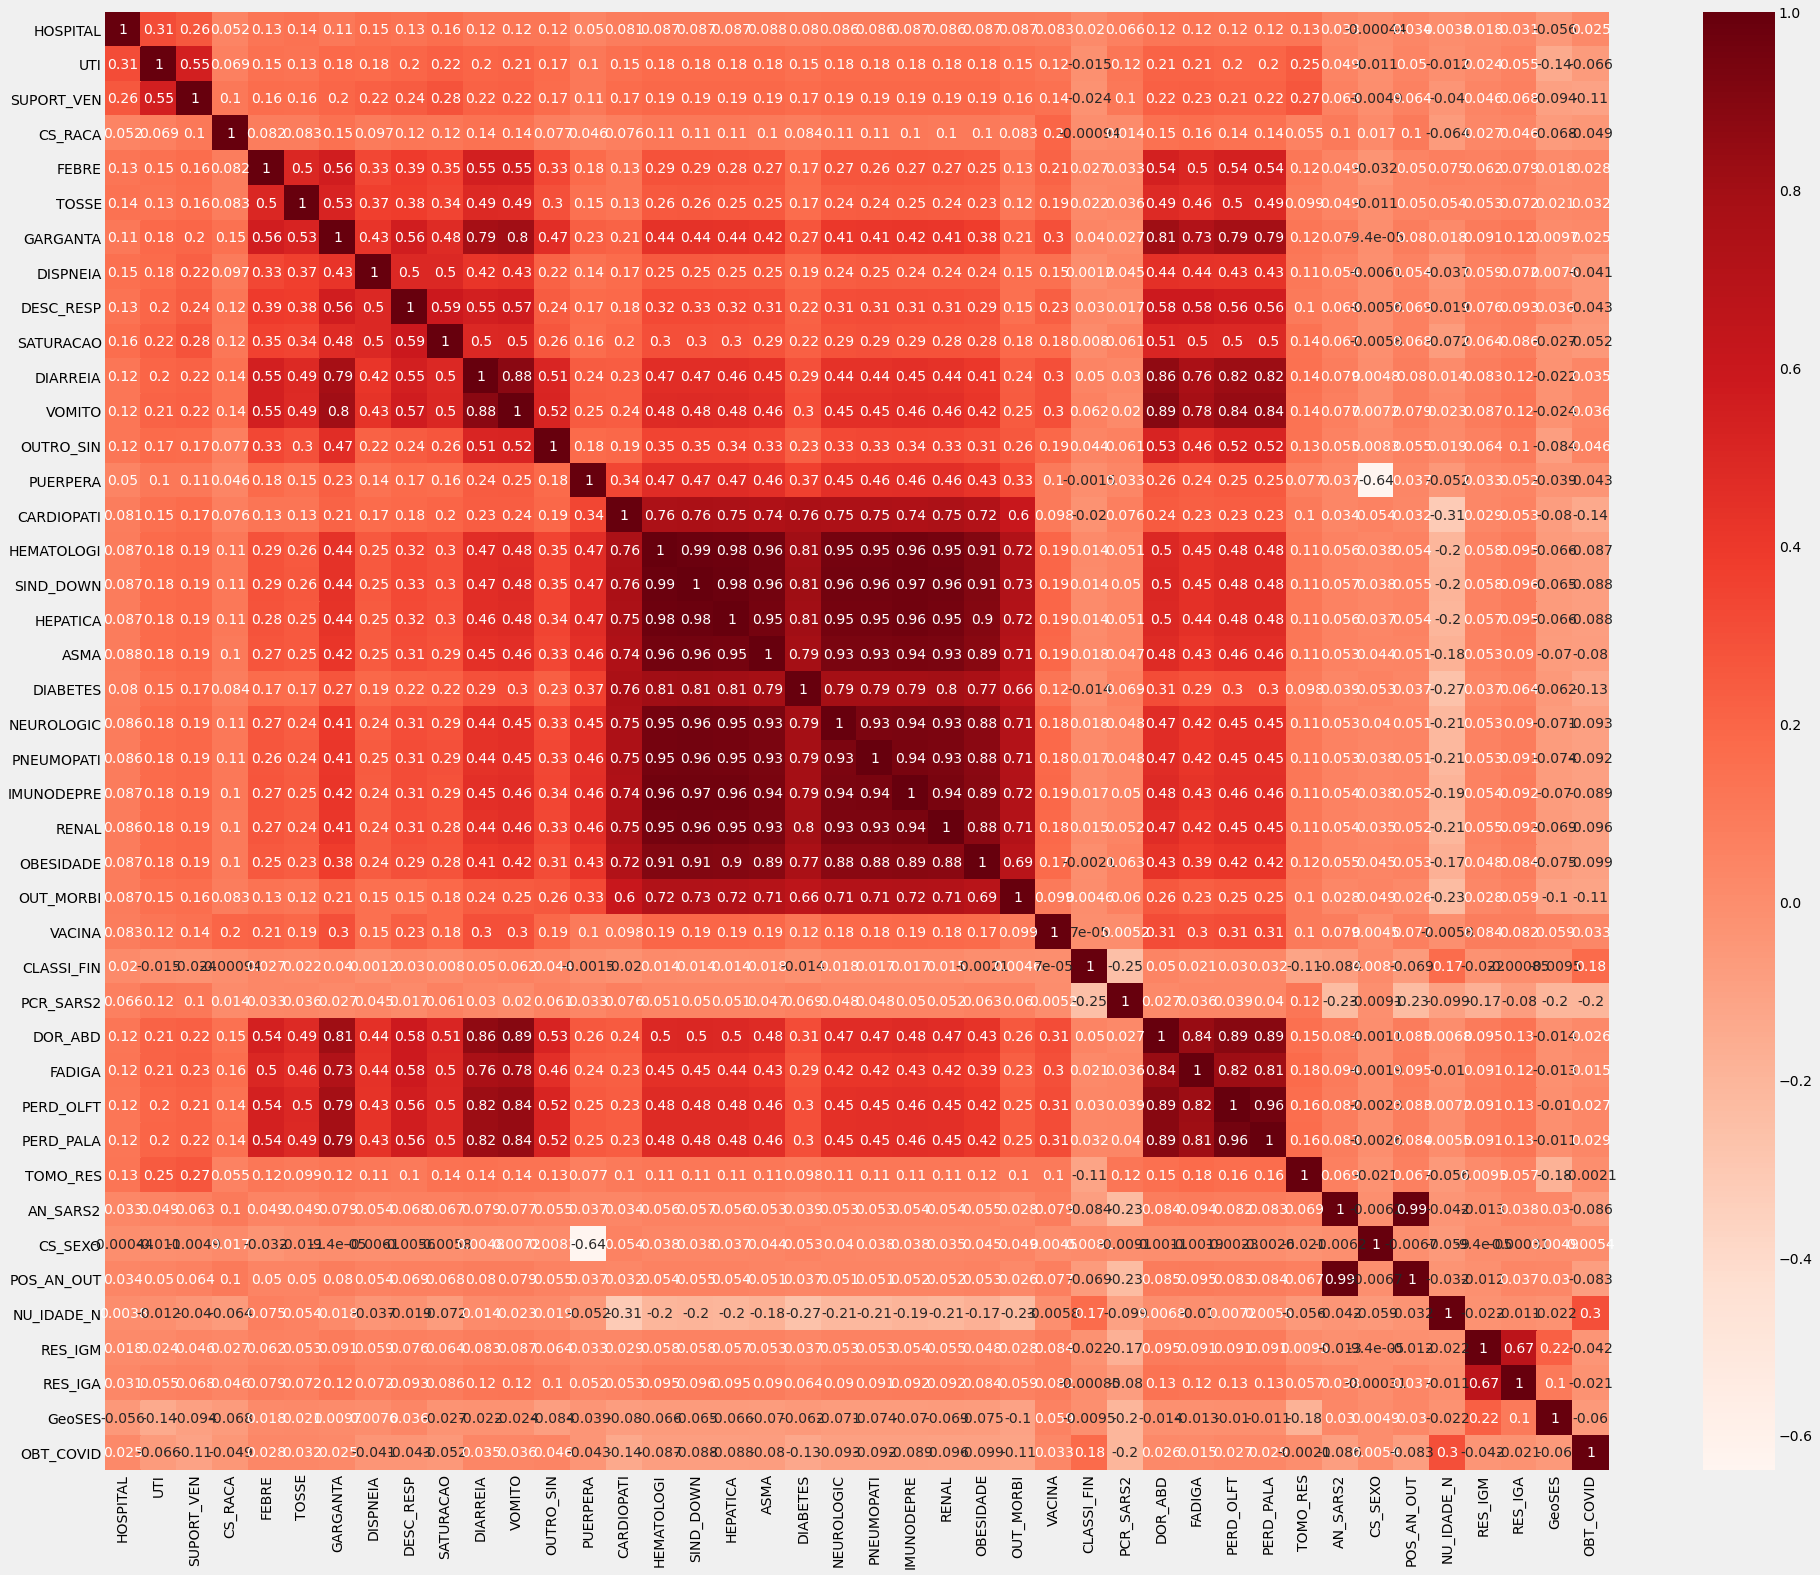

In [9]:
var_corr = verifica_correlacao(covid_df_pre_dummies,False,0.00)

In [10]:
var_corr

OBT_COVID     1.000000
NU_IDADE_N    0.295759
PCR_SARS2     0.202290
CLASSI_FIN    0.177362
CARDIOPATI    0.137682
DIABETES      0.127479
OUT_MORBI     0.109251
SUPORT_VEN    0.107066
OBESIDADE     0.098942
RENAL         0.095755
NEUROLOGIC    0.093266
PNEUMOPATI    0.091625
IMUNODEPRE    0.088560
HEPATICA      0.088170
SIND_DOWN     0.087664
HEMATOLOGI    0.087448
AN_SARS2      0.085781
POS_AN_OUT    0.082947
ASMA          0.080008
UTI           0.066045
GeoSES        0.060404
SATURACAO     0.052092
CS_RACA       0.049122
OUTRO_SIN     0.046271
DESC_RESP     0.043180
PUERPERA      0.043105
RES_IGM       0.041551
DISPNEIA      0.041222
VOMITO        0.035630
DIARREIA      0.035426
VACINA        0.032823
TOSSE         0.031781
PERD_PALA     0.028875
FEBRE         0.027695
PERD_OLFT     0.027267
DOR_ABD       0.026052
HOSPITAL      0.025434
GARGANTA      0.025064
RES_IGA       0.021440
FADIGA        0.014573
CS_SEXO       0.005390
TOMO_RES      0.002086
Name: OBT_COVID, dtype: float64

In [11]:
covid_df_pre_dummies.corr()

,HOSPITAL,UTI,SUPORT_VEN,CS_RACA,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,...,PERD_PALA,TOMO_RES,AN_SARS2,CS_SEXO,POS_AN_OUT,NU_IDADE_N,RES_IGM,RES_IGA,GeoSES,OBT_COVID
HOSPITAL,1.000000,0.313641,0.258147,0.052159,0.125941,0.136543,0.107900,0.150278,0.133371,0.159142,...,0.118000,0.125602,0.033137,-0.000444,0.033551,0.003824,0.018468,0.031012,-0.056287,0.025434
UTI,0.313641,1.000000,0.550068,0.069426,0.146257,0.134873,0.182395,0.178162,0.198608,0.219793,...,0.199949,0.249042,0.048757,-0.011391,0.050022,-0.011586,0.023962,0.055294,-0.142628,-0.066045
SUPORT_VEN,0.258147,0.550068,1.000000,0.104313,0.163369,0.158352,0.197607,0.224574,0.238534,0.282883,...,0.215649,0.266131,0.062617,-0.004902,0.063643,-0.039553,0.045715,0.067561,-0.093625,-0.107066
CS_RACA,0.052159,0.069426,0.104313,1.000000,0.081539,0.082846,0.145811,0.096914,0.122288,0.116086,...,0.142085,0.054896,0.101938,0.016821,0.101124,-0.064498,0.027122,0.045889,-0.067928,-0.049122
FEBRE,0.125941,0.146257,0.163369,0.081539,1.000000,0.500684,0.561728,0.329665,0.390592,0.353614,...,0.539602,0.116128,0.049306,-0.031995,0.050429,0.075419,0.062174,0.078808,0.018437,0.027695
TOSSE,0.136543,0.134873,0.158352,0.082846,0.500684,1.000000,0.525350,0.370004,0.379373,0.342503,...,0.492890,0.098806,0.048890,-0.011137,0.050321,0.053774,0.052694,0.071694,0.020737,0.031781
GARGANTA,0.107900,0.182395,0.197607,0.145811,0.561728,0.525350,1.000000,0.428032,0.559350,0.475928,...,0.788871,0.122739,0.079205,-0.000094,0.080248,0.017963,0.091285,0.117973,0.009702,0.025064
DISPNEIA,0.150278,0.178162,0.224574,0.096914,0.329665,0.370004,0.428032,1.000000,0.496393,0.499698,...,0.430961,0.106045,0.054035,-0.006054,0.054268,-0.037239,0.059039,0.072423,0.007566,-0.041222
DESC_RESP,0.133371,0.198608,0.238534,0.122288,0.390592,0.379373,0.559350,0.496393,1.000000,0.585796,...,0.559893,0.102373,0.067714,-0.005642,0.068743,-0.018604,0.075895,0.092844,0.035670,-0.043180
SATURACAO,0.159142,0.219793,0.282883,0.116086,0.353614,0.342503,0.475928,0.499698,0.585796,1.000000,...,0.498146,0.140511,0.067088,-0.005760,0.067929,-0.072380,0.064436,0.085932,-0.027029,-0.052092


In [7]:
modelo = XGBClassifier()
num_otimo_feat = obtem_num_features(covid_df_pre_dummies, modelo)
sel_feat = sel_features(covid_df_pre_dummies,modelo,num_otimo_feat)

 and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[05:12:10] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
C:\Users\02373373718\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[05:12:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:

In [8]:
# Obtém o número ótimo de features para LogisticRegression(
modelo = LogisticRegression()
num_otimo_feat_lr = obtem_num_features(covid_df_pre_dummies, modelo)
sel_feat_lr = sel_features(covid_df_pre_dummies,modelo,num_otimo_feat)

e/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\02373373718\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\02373373718\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as show

In [9]:
# Obtém o número ótimo de features para LogisticRegression(
modelo_dt = DecisionTreeClassifier()
num_otimo_feat_dt = obtem_num_features(covid_df_pre_dummies, modelo_dt)
sel_feat_lr = sel_features(covid_df_pre_dummies,modelo_dt,num_otimo_feat_dt)

C:\Users\02373373718\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\02373373718\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\02373373718\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\02373373718\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=4 as keyword args. From versi

In [10]:
# Obtenção dos nomes das variáveis selecionadas para Logistic Regression
# com num_idade_CAT - indice_lr_31 = [ 1,  1,  1,  1,  1,  1,  7,  1,  1,  1,  1,  1,  1,  9,  6,  1,  1,  1,  1,  1,  3,  2,  1,  1,  1,  1,  1,  1,  1,  4,  1,  8,  1,  1,  1,  5, 11,  1,  1,  1, 10,  1]
indice_lr_31 = [1, 1, 1, 1, 4, 1, 7, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

i = 0
features_lr=[]
while i < len(indice_lr_31):
    if (indice_lr_31[i]==1):
        features_lr.append(covid_df_pre_dummies.columns[i])
    i=i+1
features_lr

['HOSPITAL',
 'UTI',
 'SUPORT_VEN',
 'CS_RACA',
 'FEBRE',
 'TOSSE',
 'DISPNEIA',
 'DESC_RESP',
 'SATURACAO',
 'DIARREIA',
 'VOMITO',
 'OUTRO_SIN',
 'HEMATOLOGI',
 'SIND_DOWN',
 'HEPATICA',
 'ASMA',
 'DIABETES',
 'IMUNODEPRE',
 'RENAL',
 'OBESIDADE',
 'OUT_MORBI',
 'VACINA',
 'CLASSI_FIN',
 'PCR_SARS2',
 'FADIGA',
 'PERD_PALA',
 'TOMO_RES',
 'AN_SARS2',
 'NU_IDADE_N',
 'RES_IGM',
 'RES_IGA',
 'OBT_COVID']

In [11]:
# Obtenção dos nomes das variáveis selecionadas para XGBoost
# com num_idade_CAT - indice_XGB_32 = [ 1, 1, 1, 1, 3,  1, 7, 1, 1, 1, 1, 5, 1, 10, 2, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 6, 4, 1, 1, 1, 1, 1, 1, 11, 1, 1, 1]
indice_XGB_32 = [1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 2, 1, 7, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

i = 0
features_XGB=[]
while i < len(indice_XGB_32):
    if (indice_XGB_32[i]==1):
        features_XGB.append(covid_df_pre_dummies.columns[i])
    i=i+1
features_XGB

['HOSPITAL',
 'UTI',
 'SUPORT_VEN',
 'CS_RACA',
 'TOSSE',
 'DISPNEIA',
 'DESC_RESP',
 'SATURACAO',
 'DIARREIA',
 'OUTRO_SIN',
 'SIND_DOWN',
 'HEPATICA',
 'ASMA',
 'DIABETES',
 'NEUROLOGIC',
 'PNEUMOPATI',
 'IMUNODEPRE',
 'RENAL',
 'OBESIDADE',
 'OUT_MORBI',
 'VACINA',
 'CLASSI_FIN',
 'PCR_SARS2',
 'PERD_PALA',
 'TOMO_RES',
 'AN_SARS2',
 'CS_SEXO',
 'POS_AN_OUT',
 'NU_IDADE_N',
 'RES_IGA',
 'GeoSES',
 'OBT_COVID']

In [12]:
# Obtenção dos nomes das variáveis selecionadas para DecisionTree
# com num_idade_CAT - indiceDT4 = [28, 10,  1,  3,  4,  9, 14, 19, 20, 18, 15, 23,  6, 29,  5, 38, 39, 37, 35, 11, 31, 32, 34, 24, 22, 12,  7,  1, 17, 25,  2, 21, 27,  8, 26, 13,  1, 36, 33, 16, 30,  1]
indiceDT4 = [28, 10,  1,  2,  4,  9, 14, 19, 20, 18, 15, 23,  6, 29,  5, 37, 38, 36, 34, 11, 25, 32, 33, 30,  21, 12,  7,  1, 16, 27,  3, 26, 22,  8, 35, 13, 24,  1, 17, 31,  1]
i = 0
features_DT=[]
while i < len(indiceDT4):
    if (indiceDT4[i]==1):
        features_DT.append(covid_df_pre_dummies.columns[i])
    i=i+1
features_DT

['SUPORT_VEN', 'CLASSI_FIN', 'POS_AN_OUT', 'OBT_COVID']

In [13]:
# Obtém o número ótimo de features para ExtraTreesClassifier
modelo_XTC = ExtraTreesClassifier()
num_otimo_feat_XTC = obtem_num_features(covid_df_pre_dummies, modelo_XTC)
sel_feat_XTC = sel_features(covid_df_pre_dummies,modelo_XTC,num_otimo_feat_XTC)

C:\Users\02373373718\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\02373373718\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\02373373718\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\02373373718\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=4 as keyword args. From versi